In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

In [2]:
c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']

In [3]:
df = pd.read_excel('../adsorption.xlsx')
df

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b
0,p5,4,Mn,0.80,NaN,1.64,NaN,0.89,NaN,3.86,NaN
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.97,NaN,3.78,NaN
2,p5,4,Co,1.15,NaN,2.77,NaN,1.36,NaN,4.09,NaN
3,p5,4,Ni,1.83,NaN,4.05,NaN,2.23,NaN,4.81,NaN
4,p5,4,Cu,1.90,NaN,4.50,NaN,2.33,NaN,4.86,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,p5,0,Ag,1.93,1.44,4.92,1.34,2.61,1.20,4.98,3.91
68,p5,0,Ir,0.00,NaN,0.49,0.42,0.24,0.53,3.10,3.69
69,p5,0,Pt,1.47,NaN,3.43,1.24,1.96,1.61,4.80,4.28
70,p5,0,Au,1.97,1.57,4.96,1.78,2.63,1.32,5.00,4.07


In [4]:
df['G_OH_t'] = df['G_OH_t'] -0.3
df['G_OH_b'] = df['G_OH_b'] -0.3
df['G_OOH_t'] = df['G_OOH_t'] -0.3
df['G_OOH_b'] = df['G_OOH_b'] -0.3

In [5]:
isN4 = df['#of N'] == 4
N4_df = df[isN4] 
N4_df

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b
0,p5,4,Mn,0.80,NaN,1.64,NaN,0.59,NaN,3.56,NaN
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.67,NaN,3.48,NaN
2,p5,4,Co,1.15,NaN,2.77,NaN,1.06,NaN,3.79,NaN
3,p5,4,Ni,1.83,NaN,4.05,NaN,1.93,NaN,4.51,NaN
4,p5,4,Cu,1.90,NaN,4.50,NaN,2.03,NaN,4.56,NaN
5,p5,4,Rh,1.03,NaN,2.78,NaN,1.01,NaN,3.80,NaN
6,p5,4,Pd,2.07,NaN,4.80,NaN,2.24,NaN,4.65,NaN
7,p5,4,Ag,2.06,NaN,4.97,NaN,2.41,NaN,4.62,NaN
8,p5,4,Ir,1.08,NaN,2.41,NaN,1.04,NaN,3.88,NaN
9,p5,4,Pt,2.03,NaN,4.36,NaN,2.21,NaN,4.68,NaN


In [6]:
OH = np.array(N4_df['G_OH_t'])
O = np.array(N4_df['G_O_t'])
OOH = np.array(N4_df['G_OOH_t'])

G1, G2, G3, G4 = OH, O-OH, OOH-O, 1.23*4 - OOH
η = np.max([G1,G2,G3,G4],axis=0) - 1.23
η

array([0.69, 0.48, 0.48, 0.89, 1.24, 0.54, 1.33, 1.33, 0.24, 0.98, 2.  ,
       1.09])

In [7]:
N4_df['η_OER'] = list(η)
N4_df['η_CER'] = np.abs(N4_df['G_Cl_t']-1.36)

<ipython-input-7-8dce30e6d69b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N4_df['η_OER'] = list(η)
<ipython-input-7-8dce30e6d69b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N4_df['η_CER'] = np.abs(N4_df['G_Cl_t']-1.36)


In [8]:
N4_df

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b,η_OER,η_CER
0,p5,4,Mn,0.80,NaN,1.64,NaN,0.59,NaN,3.56,NaN,0.69,0.56
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.67,NaN,3.48,NaN,0.48,0.50
2,p5,4,Co,1.15,NaN,2.77,NaN,1.06,NaN,3.79,NaN,0.48,0.21
3,p5,4,Ni,1.83,NaN,4.05,NaN,1.93,NaN,4.51,NaN,0.89,0.47
4,p5,4,Cu,1.90,NaN,4.50,NaN,2.03,NaN,4.56,NaN,1.24,0.54
5,p5,4,Rh,1.03,NaN,2.78,NaN,1.01,NaN,3.80,NaN,0.54,0.33
6,p5,4,Pd,2.07,NaN,4.80,NaN,2.24,NaN,4.65,NaN,1.33,0.71
7,p5,4,Ag,2.06,NaN,4.97,NaN,2.41,NaN,4.62,NaN,1.33,0.70
8,p5,4,Ir,1.08,NaN,2.41,NaN,1.04,NaN,3.88,NaN,0.24,0.28
9,p5,4,Pt,2.03,NaN,4.36,NaN,2.21,NaN,4.68,NaN,0.98,0.67


# OER

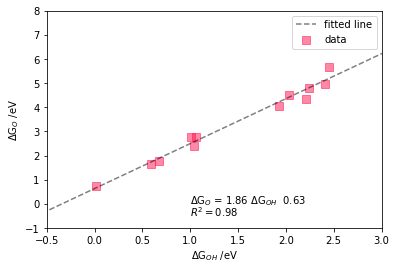

In [9]:
plt.figure(figsize=(6,4))

x_n, y_n = N4_df['G_OH_t'],N4_df['G_O_t']

plt.scatter(x_n, y_n,label = 'data' ,color=c[0], alpha=0.5 ,s=50,marker='s')

plt.xlabel('ΔG$_{OH}$ /eV')
plt.ylabel('ΔG$_O$ /eV')


res = stats.linregress(x_n, y_n)
#print(res)
x_fit = np.arange(-1,6,0.01)
y_fit = res.intercept + res.slope* x_fit


plt.xlim(-.5,3)
plt.ylim(-1,8)
plt.plot(x_fit,y_fit,'--',label='fitted line',c='black',linewidth=1.5,alpha=0.5)
plt.text( 1,0 ,'ΔG$_O$ = %.2f ΔG$_{OH}$  %.2f ' %(res.slope, res.intercept))
plt.text( 1,-.5 ,'$R^2 = %.2f$' %res.rvalue**2)
plt.legend()

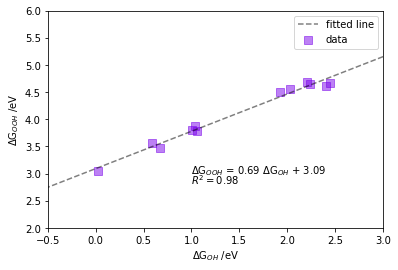

In [10]:
plt.figure(figsize=(6,4))

x_n, y_n = N4_df['G_OH_t'],N4_df['G_OOH_t']

plt.scatter(x_n, y_n,label = 'data',color=c[3], alpha=0.5 ,s=50,marker='s')

plt.xlabel('ΔG$_{OH}$ /eV')
plt.ylabel('ΔG$_{OOH}$ /eV')

res2 = stats.linregress(x_n, y_n)
#print(res)
x_fit = np.arange(-1,6,0.01)
y_fit = res2.intercept + res2.slope* x_fit


plt.xlim(-.5,3)
plt.ylim(2,6)
plt.plot(x_fit,y_fit,'--',label='fitted line',c='black',linewidth=1.5,alpha=0.5)
plt.text( 1,3.0 ,'ΔG$_{OOH}$ = %.2f ΔG$_{OH}$ + %.2f ' %(res2.slope, res2.intercept))
plt.text( 1,2.8 ,'$R^2 = %.2f$' %res2.rvalue**2)
plt.legend()

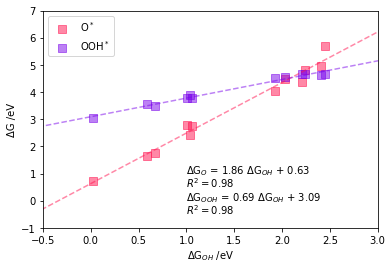

In [49]:
plt.figure(figsize=(6,4))

x_n, y_n = N4_df['G_OH_t'],N4_df['G_O_t']

plt.scatter(x_n, y_n,label = 'O$^*$' ,color=c[0], alpha=0.5 ,s=50,marker='s')


res = stats.linregress(x_n, y_n)
#print(res)
x_fit = np.arange(-1,6,0.01)
y_fit = res.intercept + res.slope* x_fit

plt.plot(x_fit,y_fit,'--' ,color=c[0],alpha=0.5)


x_n, y_n = N4_df['G_OH_t'],N4_df['G_OOH_t']

plt.scatter(x_n, y_n,label = 'OOH$^*$',color=c[3], alpha=0.5 ,s=50,marker='s')

plt.xlabel('ΔG$_{OH}$ /eV')
plt.ylabel('ΔG /eV')


res2 = stats.linregress(x_n, y_n)
#print(res)
x_fit = np.arange(-1,6,0.01)
y_fit = res2.intercept + res2.slope* x_fit


plt.xlim(-.5,3)
plt.ylim(-1,7)
plt.plot(x_fit,y_fit,'--',color=c[3],alpha=0.5)
plt.text( 1,1 ,'ΔG$_O$ = %.2f ΔG$_{OH}$ + %.2f ' %(res.slope, res.intercept))
plt.text( 1,.5 ,'$R^2 = %.2f$' %res.rvalue**2)
plt.text( 1,0 ,'ΔG$_{OOH}$ = %.2f ΔG$_{OH}$ + %.2f ' %(res2.slope, res2.intercept))
plt.text( 1,-.5 ,'$R^2 = %.2f$' %res2.rvalue**2)
plt.legend()

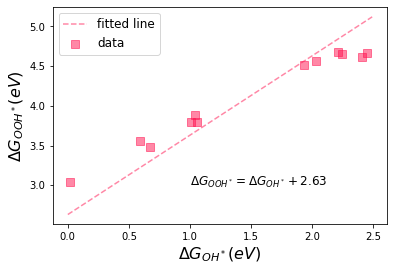

In [12]:
plt.figure(figsize=(6,4))

ΔGₒₒₕ =  np.array(N4_df['G_OOH_t'])
ΔGₒₕ = np.array(N4_df['G_OH_t'])
popt, pcov = curve_fit(func, ΔGₒₕ, ΔGₒₒₕ)

plt.scatter(ΔGₒₕ, ΔGₒₒₕ,label = 'data',color=c[0], alpha=0.5 ,s=50,marker='s')
x1 = np.arange(-.0,2.5,0.01)
#plt.plot(x1, func(x1, *popt), color='red', linewidth=1)

def func2(x, b):
    return x + b

popt, pcov = curve_fit(func2, ΔGₒₕ, ΔGₒₒₕ)
plt.plot(x1, func2(x1, *popt),'--', label='fitted line',color=c[0],alpha=0.5)
plt.ylabel('$ΔG_{OOH^*} (eV)$',fontsize=16)
plt.xlabel('$ΔG_{OH^*} (eV)$',fontsize=16)
plt.text(1,3,'$ΔG_{OOH^*}= ΔG_{OH^*} + %.2f$' %(popt[0]),fontsize=12 ) 

#plt.text(0.5,2,'ΔGₒₒₕ = %.2f ΔGₒₕ + %.2f' %(popt[0],popt[1]) )

plt.legend(fontsize=12) 


Text(0, 0.5, '$-η_{OER} (V)$')

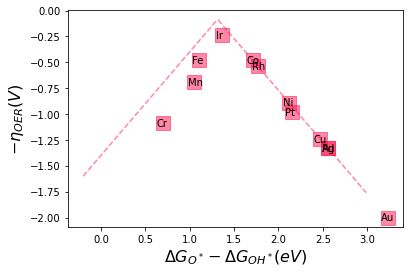

In [53]:
plt.figure(figsize=(6,4))


η = N4_df['η_OER']
ΔGₒ = N4_df['G_O_t']
ΔG2 =  ΔGₒ - ΔGₒₕ
plt.scatter(ΔG2,-η,label = 'data',color=c[0], alpha=0.5 ,s=200,marker='s')


x_fit = np.arange(-.2,3,0.01)
y_OER_fit1 = (2.63 - x_fit-1.23)
y_OER_fit2 = x_fit-1.23

η_OER_fit = np.maximum(y_OER_fit1,y_OER_fit2)
    # plot lines

TEXTS=[]    
plt.plot(x_fit , -η_OER_fit,'--', label='fitted line',color=c[0],alpha=0.5)
for i in range(len(ΔG2)) :
    plt.text(float(list(ΔG2)[i])-0.07,-float(list(η)[i])-0.03, str(N4_df.values[i][2]), fontsize=10)

    
plt.xlabel('$ΔG_{O^*} - ΔG_{OH^*} (eV)$',fontsize=16)
plt.ylabel('$-η_{OER} (V)$',fontsize=16)

$\Delta G_2 = \Delta G_O - \Delta G_{OH} = \alpha \Delta G_{OH} + \beta$

$\Delta G_3 = \Delta G_{OOH} - \Delta G_{O} = \gamma \Delta G_{OH} + \delta$

In [55]:
α = res.slope -1 
β = res.intercept
γ = res2.slope-res.slope
δ = res2.intercept-res.intercept

$\Delta G_3 = \gamma \Delta G_{OH} + \delta = {\gamma} / {\alpha} (\alpha \Delta G_{OH} + \beta ) - {\gamma \beta}/\alpha +  \delta$

$= {\gamma} / {\alpha} \Delta G_{2} - {\gamma \beta}/\alpha +  \delta$

Text(0, 0.5, '$-η_{OER} (V)$')

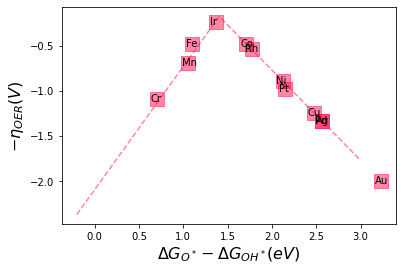

In [56]:
plt.figure(figsize=(6,4))


η = N4_df['η_OER']
ΔGₒ = N4_df['G_O_t']
ΔG2 =  ΔGₒ - ΔGₒₕ
plt.scatter(ΔG2,-η,label = 'data',color=c[0], alpha=0.5 ,s=200,marker='s')


x_fit = np.arange(-.2,3,0.01)
y_OER_fit1 =  ( (γ / α)*x_fit - (γ* β/α)+δ ) - 1.23
y_OER_fit2 = x_fit-1.23

η_OER_fit = np.maximum(y_OER_fit1,y_OER_fit2)
    # plot lines

TEXTS=[]    
plt.plot(x_fit , -η_OER_fit,'--', label='fitted line',color=c[0],alpha=0.5)
for i in range(len(ΔG2)) :
    plt.text(float(list(ΔG2)[i])-0.07,-float(list(η)[i])-0.03, str(N4_df.values[i][2]), fontsize=10)

    
plt.xlabel('$ΔG_{O^*} - ΔG_{OH^*} (eV)$',fontsize=16)
plt.ylabel('$-η_{OER} (V)$',fontsize=16)

In [ ]:
!pip install adjustText
from adjustText import adjust_text


In [ ]:
x_G2 = np.arange(-1,3.5,0.01)
y_G_OH = np.arange(-1.5,2.8,0.01)[::-1]


X, Y = np.meshgrid(x_G2  ,y_G_OH)
X = np.array(list(X))
Y = np.array(list(Y))

#print(Y)



Z1 = Y - 1.23 #G1
Z2 = X - 1.23 # G2
Z3 =  ( 0.69* Y +  3.09 ) - ( X+Y ) - 1.23 # ΔG3 = ΔG_OOH - ΔG_O , ΔG_OOH = 0.69ΔG_OH + 3.09, ΔG_O  = ΔG_OH + (ΔG_O - ΔG_OH) =ΔG1 + ΔG2  
Z4 = (1.23 * 4 - (0.69* Y +  3.09 )) -1.23 #G4 = 4.92 - ΔG_OOH

Z = np.maximum(Z1,Z2)
Z= np.maximum(Z,Z3)
Z= np.maximum(Z,Z4)


fig, ax = plt.subplots(1,1, figsize=(20,10))
#im = ax.imshow(Z, interpolation='none',extent=[0,3.5,-1.5,2.5])

im = ax.imshow(Z, interpolation='none',extent=[-1,3.5,-1.5,2.8],cmap='YlGnBu')
#im = ax.imshow(Z, interpolation='none',extent=[-1,3.5,-1.5,2.8],cmap='cool')

cb = plt.colorbar(im,ax=ax,fraction=0.25, pad=0.01)
cb.set_label('η / V',rotation = 0, y = 1.05 , labelpad = -30, size = 20)


##
x_n, y_n = - N4_df['G_OH_t'] + N4_df['G_O_t'], N4_df['G_OH_t']

plt.scatter(x_n, y_n,color='#f3872f',edgecolor='black',alpha=1 ,s=200,marker='o')

TEXTS=[] 
for i in range(len(x_n)) :
    TEXTS.append(plt.text(x_n[i], y_n[i], str(N4_df['M'][i]), fontsize=12))

adjust_text(TEXTS,expand_points=(3, 3),arrowprops=dict(arrowstyle="-",lw=2))

##



#mplcyberpunk.make_scatter_glow()
plt.xlabel('ΔG$_{O*}$ - ΔG$_{OH*}$ /eV',fontsize=24)
plt.ylabel('ΔG$_{OH*}$ /eV',fontsize=24)
plt.grid(False)

In [ ]:
N4_df

In [ ]:
plt.figure(figsize=(10,10))


x_fit = np.arange(0,1.36*2,0.01)
y_fit1 = x_fit-1.36
y_fit2 = 1.36-x_fit
y_fit = np.maximum(y_fit1,y_fit2)
plt.plot(x_fit,-y_fit, '--',c='black',linewidth=2,alpha=0.5) 
    

plt.scatter(N4_df['G_Cl_t'],-N4_df['η_CER'],color='#ff124f',s=300,marker='o',alpha=0.5)
            
TEXTS=[] 
for i in range(len(N4_df['G_Cl_t'])) :
    TEXTS.append(plt.text(N4_df['G_Cl_t'][i], -N4_df['η_CER'][i], str(N4_df['M'][i]), fontsize=14))

adjust_text(TEXTS,expand_points=(4, 4),arrowprops=dict(arrowstyle="-",lw=2))

##
    
    
plt.xlabel('ΔG$_{Cl}$ / eV',fontsize=20)
plt.ylabel('-η$_{CER}$ / V',fontsize=20)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
